In [2]:
## imports
from qiskit import *
from qiskit.algorithms import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import quantum_info, IBMQ, Aer
from qiskit import BasicAer
from qiskit.utils import QuantumInstance
from qiskit.extensions import HamiltonianGate
# backend = BasicAer.get_backend("statevector_simulator")
# quantum_instance = QuantumInstance(backend)
from qiskit.algorithms import AmplitudeEstimation
from qiskit.quantum_info import Statevector, Operator
from qiskit.opflow import CircuitStateFn
#from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector
import numpy as np
import scipy 
from numpy import pi
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt

In [3]:
## import optimisers
from qiskit.algorithms.optimizers import COBYLA
from scipy.optimize import minimize

In [4]:
# setup simulator using IBM_id
# IBMQ.save_account("1c62e8a0d2b058d0e797db9c811bc34582df5553e25812301cd1518662c0ab68d2378ac6c197b65f8be944d04b7e7439f034e3926a44fa8088538b3d13782c1a", overwrite= True)
provider = IBMQ.load_account()
IBMQ.get_provider(hub='ibm-q-education', group='iit-madras-1', project='quantum-computin')
# setup required backends 
lima = provider.get_backend('ibmq_lima')
manila = provider.get_backend('ibmq_manila')
qsm = Aer.get_backend('qasm_simulator')
stv = Aer.get_backend('statevector_simulator')
aer = Aer.get_backend('aer_simulator')

In [5]:
## sub-routines for QFT  ~
def crot(qc, l):
    """ Function to generate Controlled Rotation Ooeration  """
    if l == 0:
        return qc
    l = l-1
    qc.h(l)
    for q in range(l):
        qc.cp(pi/2**(l-q), q, l)
    #qc.barrier()
    # qc.draw()
    
def QFT(qc):
   """function to generate QFT circuit """
   dim = qc.num_qubits
   for q in range(dim):
      crot(qc, dim-q)
   for q in range(int(dim/2)):
      qc.swap(q, dim-q-1)

   #qc.draw()
   return qc
   

## Quantum Dictionary
Implement a quantum algorithm to store (key, value) pairs in the same form a regular hash-based dictionary works. 

Given the keys $\{k_i\}$ and values $\{v_i\}$ the quantum dictionary implements a circuit to prepare the state
$$  \ket{\psi(k,v)} = \sum_{k_i} \ket{k_i}\ket{v_i}  $$


Our purpose here is to use the quantum dictionary format to store the function evaluations of the an function 'f(k)' on the keys 'k',
$$  \ket{\psi(f)} = \sum_{k_i} \ket{k_i}\ket{f(k_i)} $$

### Example 1: 
There's a function 
'f(x)'such that
$$ f(0) = 5, f(3) = 7
$$

In [6]:
precision = 3
qreg = QuantumRegister(2, name= 'qreg')
qm = QuantumRegister(precision, name= 'precision')
ancilla = QuantumRegister(1, name= 'ancilla')
creg_q = ClassicalRegister(2, name='creg')
creg_qm = ClassicalRegister(precision, name= 'precision_c')

qc = QuantumCircuit(qreg, qm, ancilla, creg_qm, creg_q)

qc.h(qreg)
qc.h(qm)
qc.rx(pi/2, ancilla)
qc.z(ancilla)
qc.x(ancilla)
qc.barrier()

# qc.x(qreg[0])
# qc.mcry(  4*(2*pi/2**4)*2, [qreg[0],qm[0]],ancilla)
# qc.mcry(  4*(2*pi/2**4)*2, [qreg[0],qreg[1],qm[0]],ancilla)
# qc.mcry(  1*(2*pi/2**4)*2, [qreg[1],qm[0]],ancilla)
qc.x(qreg)
qc.mcry(5*(2*pi/2**precision)*2, [qreg[0], qreg[1], qm[0]], ancilla)
qc.mcry(5*(2*pi/2**precision)*4, [qreg[0], qreg[1], qm[1]], ancilla)
qc.mcry(5*(2*pi/2**precision)*8, [qreg[0], qreg[1], qm[2]], ancilla)
qc.x(qreg)

# qc.x(qreg)
qc.mcry(7*(2*pi/2**precision)*2, [qreg[0], qreg[1], qm[0]], ancilla)
qc.mcry(7*(2*pi/2**precision)*4, [qreg[0], qreg[1], qm[1]], ancilla)
qc.mcry(7*(2*pi/2**precision)*8, [qreg[0], qreg[1], qm[2]], ancilla)
# qc.x(qreg)


qc = qc.append(QFT(QuantumCircuit(precision, name= 'QFT')).to_gate().inverse() , [2,3,4]  )
qc.barrier()
# qc.draw()




In [7]:
qc.measure(qreg, creg_q )
qc.measure(qm, creg_qm)
# qc.draw()


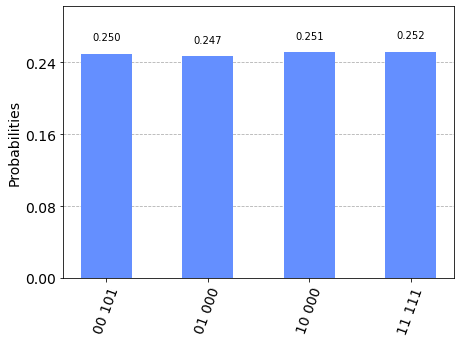

In [8]:
counts = execute(qc, backend= aer, shots= 10024).result().get_counts()
plot_histogram(counts)

In [1]:
def conditional( ):
    pass

#### Example 2:
Function 'f(x)' defined on 3 variables as :

$$  f(x_1, x_2, x_3) = -2 x_1 x_2 + 3 x_1 x_3 - x_1   $$

In [49]:
precision = 3
qreg = QuantumRegister(3, name= 'qreg')
qm = QuantumRegister(precision, name= 'precision')
ancilla = QuantumRegister(1, name= 'ancilla')
creg_q = ClassicalRegister(3, name='creg')
creg_qm = ClassicalRegister(precision, name= 'precision_c')

qc = QuantumCircuit(qreg, qm, ancilla, creg_qm, creg_q)

qc.h(qreg)
qc.h(qm)
qc.rx(pi/2, ancilla)
qc.z(ancilla)
qc.x(ancilla)
qc.barrier()



qc.mcry(-2*(2*pi/2**precision)*2, [qreg[0], qreg[1], qm[0]], ancilla)
qc.mcry(-2*(2*pi/2**precision)*4, [qreg[0], qreg[1], qm[1]], ancilla)
qc.mcry(-2*(2*pi/2**precision)*8, [qreg[0], qreg[1], qm[2]], ancilla)

qc.mcry(-1*(2*pi/2**precision)*2, [qreg[0],  qm[0]], ancilla)
qc.mcry(-1*(2*pi/2**precision)*4, [qreg[0],  qm[1]], ancilla)
qc.mcry(-1*(2*pi/2**precision)*8, [qreg[0],  qm[2]], ancilla)

qc.mcry(3*(2*pi/2**precision)*2, [qreg[0], qreg[2], qm[0]], ancilla)
qc.mcry(3*(2*pi/2**precision)*4, [qreg[0], qreg[2], qm[1]], ancilla)
qc.mcry(3*(2*pi/2**precision)*8, [qreg[0], qreg[2], qm[2]], ancilla)



qc = qc.compose(QFT(QuantumCircuit(precision, name= 'QFT')).to_gate().inverse() , qm  )

qc.x(ancilla)
qc.z(ancilla)
qc.rx(pi/2, ancilla)


qc.barrier()
# qc.draw()




In [44]:
qc.measure(qreg, creg_q )
qc.measure(qm, creg_qm)
# qc.draw()

In [46]:
counts = execute(qc, backend= aer, shots= 10024).result().get_counts()
# plot_histogram(counts)
counts

{'000 000': 1307,
 '001 111': 1209,
 '101 010': 1262,
 '100 000': 1271,
 '111 000': 1244,
 '010 000': 1251,
 '110 000': 1220,
 '011 101': 1260}

#### Example 3 :

Follows from the last exmaple, we use a post processing layer of grover operators to amplify the states with negative 'values'.

In [95]:
## grover operator for conditioning amplification
def grover(precision, steps):
    qreg = QuantumRegister(precision)
    ancilla = QuantumRegister(1)
    qc = QuantumCircuit(qreg, ancilla, name= 'Grover')

    for q in range(steps):
        qc.x(ancilla)
        qc.h(ancilla)
        qc.cx(qreg[0], ancilla)
        qc.h(ancilla)
        qc.x(ancilla)

       
        qc.h(qreg)
        qc.x(qreg)
        qc.x(ancilla)
        qc.h(ancilla)
        qc.mcx(qreg ,ancilla)
        qc.h(ancilla)
        qc.x(ancilla)
        qc.x(qreg)
        qc.h(qreg)
        

        
    return qc.to_gate()


    

In [100]:
precision = 3
qreg = QuantumRegister(3, name= 'qreg')
qm = QuantumRegister(precision, name= 'precision')
ancilla = QuantumRegister(1, name= 'ancilla')
creg_q = ClassicalRegister(3, name='creg')
creg_qm = ClassicalRegister(precision, name= 'precision_c')

qc = QuantumCircuit(qreg, qm, ancilla, creg_qm, creg_q)

qc.h(qreg)
qc.h(qm)

qc.rx(pi/2, ancilla)
qc.z(ancilla)
qc.x(ancilla)
qc.barrier()



qc.mcry(-2*(2*pi/2**precision)*2, [qreg[0], qreg[1], qm[0]], ancilla)
qc.mcry(-2*(2*pi/2**precision)*4, [qreg[0], qreg[1], qm[1]], ancilla)
qc.mcry(-2*(2*pi/2**precision)*8, [qreg[0], qreg[1], qm[2]], ancilla)

qc.mcry(-1*(2*pi/2**precision)*2, [qreg[0],  qm[0]], ancilla)
qc.mcry(-1*(2*pi/2**precision)*4, [qreg[0],  qm[1]], ancilla)
qc.mcry(-1*(2*pi/2**precision)*8, [qreg[0],  qm[2]], ancilla)

qc.mcry(3*(2*pi/2**precision)*2, [qreg[0], qreg[2], qm[0]], ancilla)
qc.mcry(3*(2*pi/2**precision)*4, [qreg[0], qreg[2], qm[1]], ancilla)
qc.mcry(3*(2*pi/2**precision)*8, [qreg[0], qreg[2], qm[2]], ancilla)

qc.x(ancilla)
qc.z(ancilla)
qc.rx(-pi/2, ancilla)


qc = qc.compose(QFT(QuantumCircuit(precision, name= 'QFT')).to_gate().inverse() , qm  )
qc.barrier()
# qc.draw()




In [101]:
# qc.draw()
qc = qc.compose(grover(precision,1), [qm[0], qm[1], qm[2], ancilla] )
# qc.decompose().draw()

In [102]:
qc.measure(qm, creg_qm)

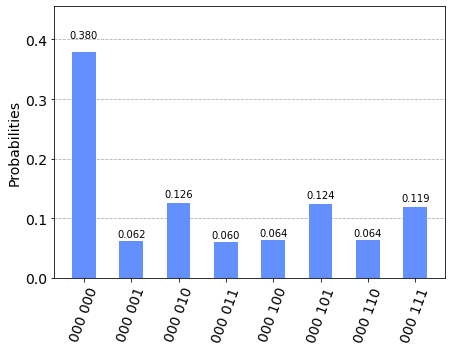

In [103]:
counts = execute(qc, backend= aer, shots= 10024).result().get_counts()
plot_histogram(counts)
# counts

#### QUBO using quantum dictionary

In [74]:
qc.append()

TypeError: QuantumCircuit.append() missing 1 required positional argument: 'instruction'

Say the QUBO objective function for two variables $x_1, x_2$ is 
$$  f(x_1, x_2) = 
$$